In [1]:
import pandas as pd
import numpy as np

filepath = 'https://raw.githubusercontent.com/PhimWi/Logistic-Regression-and-Analysis/main/%E0%B8%AA%E0%B8%B3%E0%B8%A3%E0%B8%A7%E0%B8%88%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%83%E0%B8%8A%E0%B9%89%20Smartphone%20(Responses).csv'
df = pd.read_csv(filepath)


In [2]:
df_encoded = pd.get_dummies(df, columns=['Gender','Age','Occupation','Salary','Gaming', 'Social_Media', 'Entertainment', 'Photo_Video'], dtype=int)
#create dummy variables

In [3]:
df_encoded.drop(columns=[ 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'], inplace=True)

df_encoded.dropna(inplace=True)

In [4]:
!pip install scikit-learn pandas
!pip install shap --upgrade
import shap

In [5]:
df_encoded.columns
#checking all columns in dataframe

Index(['System', 'New_smartphone_choice', 'Reason', 'Gender_Female',
       'Gender_Male', 'Age_21-25 yrs', 'Age_26-30 yrs', 'Age_31-35 yrs',
       'Age_36-40 yrs', 'Occupation_Freelancer', 'Occupation_Gov_Off',
       'Occupation_Private_sector', 'Occupation_State_enterprise',
       'Occupation_Student', 'Occupation_unemployed',
       'Salary_20,001-30,000 Baht', 'Salary_30,001-40,000 Baht',
       'Salary_40,001-50,000 Baht', 'Salary_50,001-60,000 Baht',
       'Salary_less than 20,000 Baht', 'Salary_more  than 60,000 Baht',
       'Gaming_Least', 'Gaming_Moderate', 'Gaming_Most Often', 'Gaming_Often',
       'Gaming_Quite less', 'Social_Media_Least', 'Social_Media_Moderate',
       'Social_Media_Most Often', 'Social_Media_Often',
       'Social_Media_Quite less', 'Entertainment_Least',
       'Entertainment_Moderate', 'Entertainment_Most Often',
       'Entertainment_Often', 'Entertainment_Quite less', 'Photo_Video_Least',
       'Photo_Video_Moderate', 'Photo_Video_Most Often', 

In [6]:
feature_cols = ['Gender_Female',
       'Gender_Male', 'Age_21-25 yrs', 'Age_26-30 yrs', 'Age_31-35 yrs',
       'Age_36-40 yrs', 'Occupation_Freelancer', 'Occupation_Gov_Off',
       'Occupation_Private_sector', 'Occupation_State_enterprise',
       'Occupation_Student', 'Occupation_unemployed',
       'Salary_20,001-30,000 Baht', 'Salary_30,001-40,000 Baht',
       'Salary_40,001-50,000 Baht', 'Salary_50,001-60,000 Baht',   'Gaming_Least', 'Gaming_Moderate', 'Gaming_Most Often', 'Gaming_Often',
       'Gaming_Quite less', 'Social_Media_Least', 'Social_Media_Moderate',
       'Social_Media_Most Often', 'Social_Media_Often',
       'Social_Media_Quite less', 'Entertainment_Least',
       'Entertainment_Moderate', 'Entertainment_Most Often',
       'Entertainment_Often', 'Entertainment_Quite less', 'Photo_Video_Least',
       'Photo_Video_Moderate', 'Photo_Video_Most Often', 'Photo_Video_Often',
       'Photo_Video_Quite less']

X = df_encoded[feature_cols]
y = df_encoded['System']

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)


from sklearn.model_selection import train_test_split
#test30%,train70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

#print(y_pred)

In [8]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 0,  2],
       [ 2, 17]])

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.89      0.89      0.89        19

    accuracy                           0.81        21
   macro avg       0.45      0.45      0.45        21
weighted avg       0.81      0.81      0.81        21



In [10]:
import matplotlib.pyplot as plt

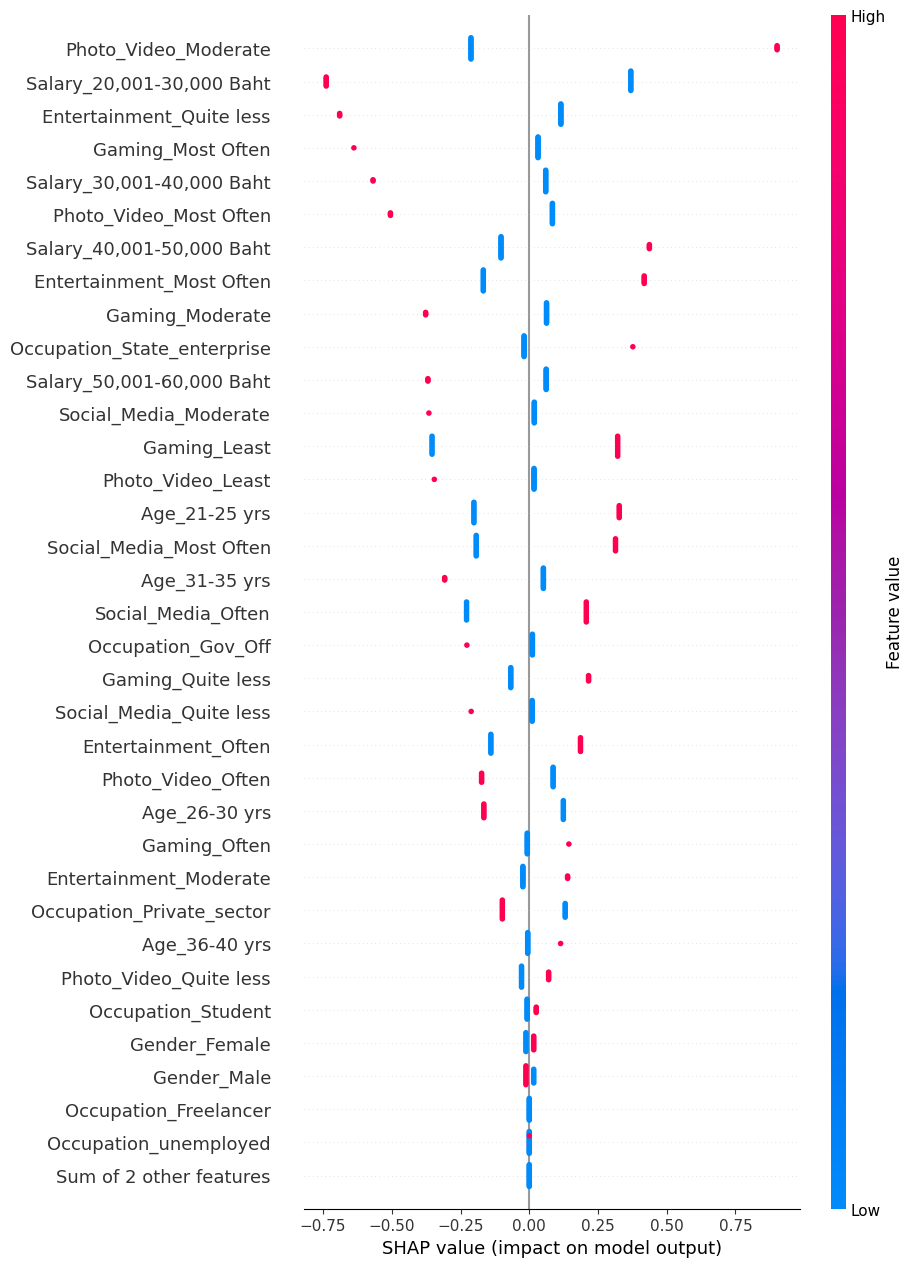

In [11]:
explainer = shap.Explainer(logreg, X_test)
shap_values = explainer(X_test)

#download javascript
shap.initjs()

#Beeswarm plot
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0), max_display=35)

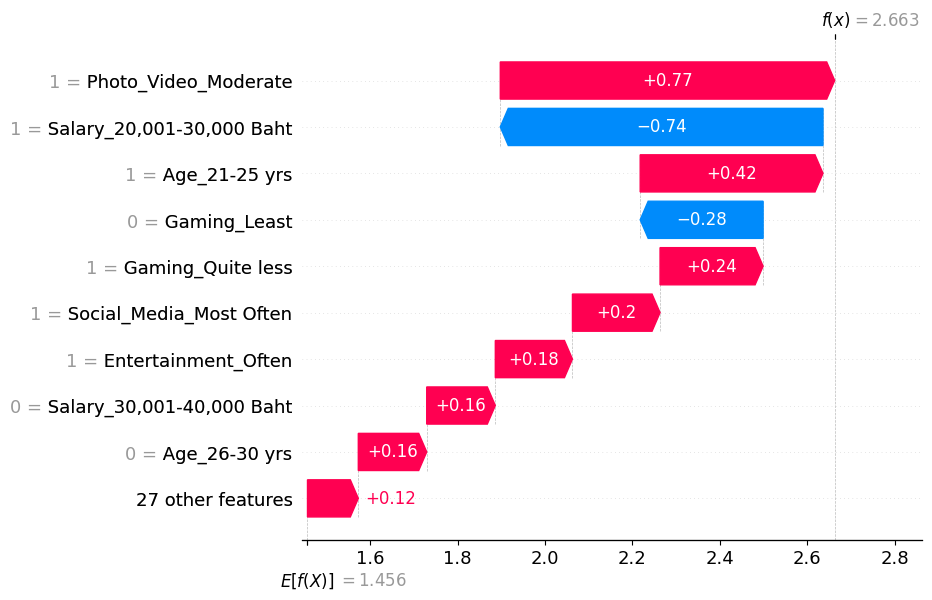

In [12]:
random_sample = X_test.sample(n=1, random_state=24)

predict = logreg.predict(random_sample)
explainer = shap.Explainer(logreg, X_train)
shap_values = explainer(random_sample)

shap.plots.waterfall(shap_values[0])

In [13]:
theta = logreg.coef_
print(f"Coefficients (theta) : {theta}")

intercept = logreg.intercept_
print(f"Intercept (theta0) : {intercept}")

from sklearn.metrics import log_loss
y_pred_prob = logreg.predict_proba(X_test)
cost = log_loss(y_test, y_pred_prob)
print(f"Log Loss : {cost}")


Coefficients (theta) : [[ 0.02837259 -0.02836031  0.52853605 -0.28909279 -0.35907376  0.11964279
   0.0380232  -0.23822648 -0.22856176  0.39553325  0.03324407  0.
  -1.10797062 -0.62806373  0.53954314 -0.43012475  0.67521542 -0.43963779
  -0.66973895  0.1511325   0.2830411  -0.33694412 -0.38332775  0.50660455
   0.43551694 -0.22183735 -0.26911662  0.16265232  0.58522886  0.32590076
  -0.80465303 -0.36264166  1.11338502 -0.58912284 -0.26012801  0.09851977]]
Intercept (theta0) : [1.27044101]
Log Loss : 0.544782419650987
